<a href="https://colab.research.google.com/github/hashmiabrar1/Deep-Learning-Hands-on/blob/main/LinearModelUsingAutograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Constructing a single layer NN with RELU activation to construct a simple linear model.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Linear Regression
x_train=np.array([[3.3],[4.4],[2.2],[6.71],[8.98],[5.56],[6.21],[2.167],[3.1],[7.997],[5.313],[10.791],[4.168],[6.86]])
y_train=np.array([[1.76],[2.4],[2.09],[3.71],[1.221],[2.287],[3.465],[2.967],[3.1],[2.827],[1.65],[1.791],[1.3],[1.573]])
print(x_train)
print(y_train)

[[ 3.3  ]
 [ 4.4  ]
 [ 2.2  ]
 [ 6.71 ]
 [ 8.98 ]
 [ 5.56 ]
 [ 6.21 ]
 [ 2.167]
 [ 3.1  ]
 [ 7.997]
 [ 5.313]
 [10.791]
 [ 4.168]
 [ 6.86 ]]
[[1.76 ]
 [2.4  ]
 [2.09 ]
 [3.71 ]
 [1.221]
 [2.287]
 [3.465]
 [2.967]
 [3.1  ]
 [2.827]
 [1.65 ]
 [1.791]
 [1.3  ]
 [1.573]]


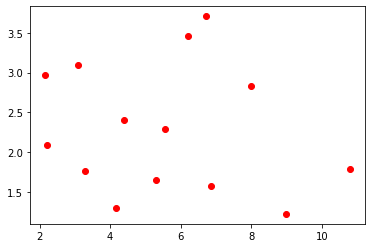

In [ ]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.show()

In [ ]:
#Convert to tensors
import torch
X_train=(torch.from_numpy(x_train)).type(torch.FloatTensor)
Y_train=(torch.from_numpy(y_train)).type(torch.FloatTensor)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)
#requires_grad will only be true for x_train.

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [ ]:
#A single layer with 100 neurons declared
input_size=1
hidden_size=100
output_size=1
learning_rate=float(1e-6)

#After one round/epoch we update parms with learning_rate

In [ ]:
#Declaring weights
w1=torch.rand(input_size, hidden_size, requires_grad=True).type(torch.FloatTensor)
w1.shape

torch.Size([1, 100])

In [ ]:
w2=torch.rand(hidden_size, output_size, requires_grad=True ).type(torch.FloatTensor)
w2.shape

torch.Size([100, 1])

In [ ]:
#We run it for 300 iterations
for iter in range(1,301):
  y_pred=X_train.mm(w1).clamp(min=0).mm(w2)           #Doing matrix multiplication and clamp negative nos to 0 with RELU activation then mm with w2.
  loss=(y_pred - Y_train ).pow(2).sum()              #Mean Square Error
  
  if(iter%50==0):
    print(iter, loss.item())
  loss.backward() #Backward Propagation to calculate gradients. Uses autograd. All wt computations are been tracked by params having requires_grad as True
  with torch.no_grad():     #Turning off autograd history tracking
    w1-=learning_rate*w1.grad
    w2-=learning_rate*w2.grad
    w1.grad.zero_()       #Making w1 gradient back to zero so as to be used for next pass/epoch
    w2.grad.zero_()

#Observe below reducing loss

50 4011.09716796875
100 170.583984375
150 30.165237426757812
200 24.02964210510254
250 23.73335838317871
300 23.718994140625


In [ ]:
#Final weights of our model with 100 neurons
print('w1',w1)
print('w2',w2)


w1 tensor([[ 7.5377e-01,  2.9399e-01,  4.1612e-01, -2.7152e-03,  5.9207e-02,
         -2.1662e-03,  5.5422e-01,  6.8936e-01,  6.3333e-01,  2.0618e-01,
         -1.3003e-03,  2.7530e-01,  7.5725e-01, -3.8964e-05,  2.7834e-02,
         -8.8192e-03, -1.5704e-02,  1.6896e-01,  6.7339e-01,  5.7733e-01,
          8.5629e-01,  1.2687e-01,  5.6437e-01,  3.0933e-01,  9.1877e-02,
          7.1928e-01, -1.6499e-02,  1.5283e-01,  3.3028e-01,  9.2654e-02,
         -7.7444e-04,  3.9691e-01,  3.3000e-01,  2.7242e-01,  2.2430e-01,
          6.8900e-01, -1.5232e-04,  3.5779e-01,  2.9930e-01, -6.3091e-04,
          2.1116e-01,  7.4970e-01, -9.1482e-04,  3.5192e-01, -2.8909e-04,
          9.7385e-01, -5.8161e-03,  3.6770e-01,  2.2131e-01, -2.6820e-03,
         -1.2733e-02, -7.0580e-03,  1.4454e-01,  7.8291e-01, -3.5562e-03,
          6.1923e-02,  6.1619e-01,  1.8306e-01,  2.1645e-01,  2.5626e-01,
          4.6973e-01,  9.1630e-01,  3.1724e-01,  2.5259e-01,  3.4224e-01,
          9.8700e-01, -1.3731e-03, 

In [ ]:
#Final predicted values
x_train_tensor=torch.from_numpy(x_train).type(torch.FloatTensor)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 2.2000],
        [ 6.7100],
        [ 8.9800],
        [ 5.5600],
        [ 6.2100],
        [ 2.1670],
        [ 3.1000],
        [ 7.9970],
        [ 5.3130],
        [10.7910],
        [ 4.1680],
        [ 6.8600]])

In [ ]:
#Using the trained weights and x inputs.
predicted=x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted

tensor([[1.1132],
        [1.4843],
        [0.7421],
        [2.2635],
        [3.0293],
        [1.8756],
        [2.0949],
        [0.7310],
        [1.0457],
        [2.6977],
        [1.7923],
        [3.6402],
        [1.4060],
        [2.3141]], grad_fn=<MmBackward>)

In [ ]:
predicted_numpy_array=predicted.detach().numpy()

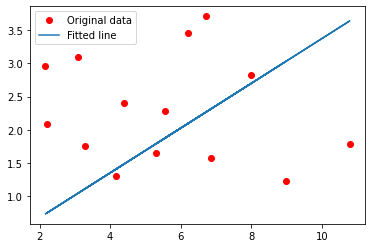

In [ ]:
plt.plot(x_train, y_train,  'ro', label='Original data')
plt.plot(x_train, predicted_numpy_array, label='Fitted line')
plt.legend()
plt.show()

#The prediction is a straight line which is the best possible points.